<a href="https://colab.research.google.com/github/abubakarali3/BinaryClassification/blob/main/Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import os
# import cv2


In [ ]:
# data_root = 
# train_dir = '/kaggle/working/data/train/'
# test_dir  = '/kaggle/working/data/test1/'
# pwd = os.getcwd()

# train_dir2 = pwd + '/dataset/training_set'
# test_dir2 = pwd + '/dataset/test_set'

In [ ]:
# images = []
# for root_folder in os.listdir(train_dir):

#   path_root = os.path.join(train_dir,root_folder)
#   count = 0
#   for img_path in os.listdir(path_root):
    
#     image_path = os.path.join(path_root,img_path)
#     img = cv2.imread(image_path)
#     count +=1
#     images.append(img)
#     print('image append :',count)


In [ ]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,ConcatDataset,DataLoader
from torchvision import transforms,datasets,models
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# train_dir = '/kaggle/working/data/train/'
# test_dir  = '/kaggle/working/data/test1/'
pwd = os.getcwd()
train_dir = pwd + '/train'
test_dir = pwd + '/test1'

In [ ]:
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [ ]:
img1,img2 = plt.imread(train_dir+'/'+train_files[56]), plt.imread(train_dir+'/'+train_files[57])

In [ ]:
img1.shape , img2.shape

((499, 254, 3), (495, 500, 3))

In [ ]:
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else:
                self.label = 0
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):

      img = Image.open(os.path.join(self.dir, self.file_list[idx]))
      if self.transform:
          img = self.transform(img)
      if self.mode == 'train':
          img = img.numpy()
          return img.astype('float32'), self.label
      else:
          img = img.numpy()
          return img.astype('float32'), self.file_list[idx]

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

**Dataset 1**

In [ ]:
cat_files1 = [tf for tf in train_files if 'cat' in tf]
dog_files1 = [tf for tf in train_files if 'dog' in tf]

In [ ]:
len(train_files)

25000

In [ ]:
pcats = np.random.permutation(cat_files1)
pdogs = np.random.permutation(dog_files1)

In [ ]:
train_size = 5000
valid_size = 6000
test_size = 7000

train_cats_files = pcats[:5000]
valid_cats_files = pcats[5000:6000]
test_cats_files = pcats[6000:7000]

train_dogs_files = pdogs[:5000]
valid_dogs_files = pdogs[5000:6000]
test_dogs_files =  pdogs[6000:7000]

In [ ]:
len(train_cats_files), len(valid_cats_files), len(test_cats_files)

(5000, 1000, 1000)

In [ ]:
train_cats = CatDogDataset(train_cats_files, train_dir, transform = data_transform)
train_dogs = CatDogDataset(train_dogs_files, train_dir, transform = data_transform)

valid_cats = CatDogDataset(valid_cats_files, train_dir, transform = data_transform)
valid_dogs = CatDogDataset(valid_dogs_files, train_dir, transform = data_transform)

test_cats = CatDogDataset(test_cats_files, train_dir, transform = data_transform)
test_dogs = CatDogDataset(test_dogs_files, train_dir, transform = data_transform)

In [ ]:
def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0))) 

In [ ]:
train_dataset = ConcatDataset([train_cats, train_dogs])

valid_dataset = ConcatDataset([valid_cats, valid_dogs])

test_dataset = ConcatDataset([test_cats, test_dogs])

In [ ]:
train_loader = DataLoader(train_dataset,batch_size=40,shuffle=True,num_workers=2)

valid_loader = DataLoader(valid_dataset,batch_size=40,shuffle=True,num_workers=2)

test_loader = DataLoader(test_dataset,batch_size=40,shuffle=True,num_workers=2)

classes = ['cat','dog']

torch.Size([3, 128, 128])


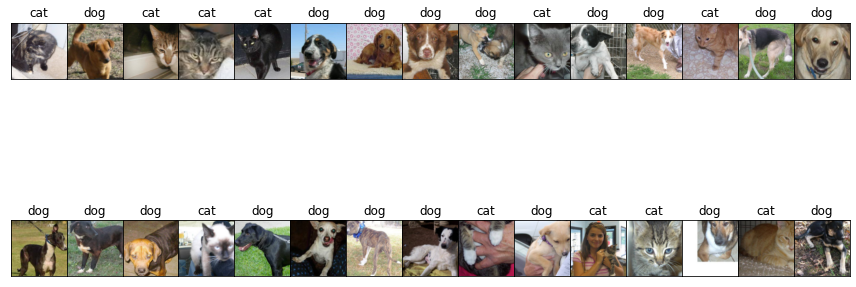

In [ ]:
data_iter = iter (train_loader)
images,labels = data_iter.next()
i = images[0]
print(i.shape)
fig = plt.figure(figsize=(12,12))

for idx in np.arange(30):
    ax = fig.add_subplot(2, 15, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
    fig.tight_layout()
    plt.subplots_adjust(wspace =0)
  

In [ ]:
class Net(nn.Module):
  def __init__(self):

    super(Net,self).__init__()

    self.conv1 = nn.Conv2d(3,16,3,padding=1)
    self.conv2 = nn.Conv2d(16,16,3,padding=1)
    self.pool  = nn.MaxPool2d(2,2)

    self.conv3 = nn.Conv2d(16,32,3,padding=1)
    self.pool = nn.MaxPool2d(2,2)

    self.conv4 = nn.Conv2d(32,64,3,padding=1)
    
    #Multi Linear layer perceptron

    self.fc1 = nn.Linear(64*16*16,500)
    self.fc2 = nn.Linear(500,2)
    self.dropout = nn.Dropout(0.25)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.pool(F.relu(self.conv4(x)))


    x = x.view(-1,16*16*64)


    x = F.relu(self.fc1(x))
    x = self.dropout(x) 
    x = F.relu(self.fc2(x))

    return x









In [ ]:
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
  print('Model will be trained on Gpu!')
else:
  print('Model will be trained on Cpu!')

Model will be trained on Gpu!


In [ ]:

model = Net()
if train_on_gpu:
  model.cuda()


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

8219406

**Vanilla Convolution Neural Network**

Trainning

In [ ]:
n_epochs = 30

trainLosses = []
validLosses = []
testLosses = []

validLoss_min = np.Inf
for epoch in range(1,n_epochs+1):

  train_loss = 0
  valid_loss = 0
  testing_loss = 0
  model.train()
  for data, targets in train_loader:

    if train_on_gpu:
      data ,targets = data.cuda(),targets.cuda()

    optimizer.zero_grad()

    output = model(data)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_loss += loss.item() * data.size(0)

  print('Epoch: {} \tTraining Loss: {:.4f} '.format(
      epoch, train_loss/len(train_loader.dataset)))
  trainLosses.append(train_loss/len(train_loader.dataset))

  ### Validation Phase 
  model.eval()

  for data,targets in valid_loader:
    if train_on_gpu:
      data,targets = data.cuda(),targets.cuda()
    output = model(data)
    loss =  criterion(output,targets)
    valid_loss += loss.item()*data.size(0)

  print('Epoch: {} \tValidation Loss: {:.4f} '.format(
  epoch, valid_loss/len(valid_loader.dataset)))

  valid_loss = valid_loss/len(valid_loader.dataset)
  validLosses.append(valid_loss)

  if valid_loss < validLoss_min:
    print("Validation Loss decreased ({:.4f} --> {:.4f} Saving model ....)".format(validLoss_min,valid_loss))
    
    validLoss_min = valid_loss
    torch.save(model.state_dict(),'valid_model_catsdogs.pt')

  ### Testing Phase
  with torch.no_grad():

    for data,targets in test_loader:
      
      if train_on_gpu:
        data,targets = data.cuda(),targets.cuda()

      output = model(data)
      loss = criterion(output,targets)
      testing_loss += loss.item()*data.size(0)

  print('Epoch: {} \tTesting Loss: {:.4f} '.format(
      epoch, testing_loss/len(test_loader.dataset)))
  
  testLosses.append(testing_loss/len(test_loader.dataset))

  model.train()



np.save('train',np.asarray(trainLosses))
np.save('valid',np.asarray(validLosses))
np.save('test',np.asarray(testLosses))


  







  

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 0.6932 
Epoch: 1 	Validation Loss: 0.6931 
Validation Loss decreased (inf --> 0.6931 Saving model ....)
Epoch: 1 	Testing Loss: 0.6931 
Epoch: 2 	Training Loss: 0.6931 
Epoch: 2 	Validation Loss: 0.6931 
Epoch: 2 	Testing Loss: 0.6931 
Epoch: 3 	Training Loss: 0.6931 
Epoch: 3 	Validation Loss: 0.6931 
Epoch: 3 	Testing Loss: 0.6931 
Epoch: 4 	Training Loss: 0.6931 
Epoch: 4 	Validation Loss: 0.6931 
Epoch: 4 	Testing Loss: 0.6931 
Epoch: 5 	Training Loss: 0.6931 
Epoch: 5 	Validation Loss: 0.6931 
Epoch: 5 	Testing Loss: 0.6931 
Epoch: 6 	Training Loss: 0.6931 
Epoch: 6 	Validation Loss: 0.6931 
Epoch: 6 	Testing Loss: 0.6931 
Epoch: 7 	Training Loss: 0.6931 
Epoch: 7 	Validation Loss: 0.6931 
Epoch: 7 	Testing Loss: 0.6931 
Epoch: 8 	Training Loss: 0.6931 
Epoch: 8 	Validation Loss: 0.6931 
Epoch: 8 	Testing Loss: 0.6931 
Epoch: 9 	Training Loss: 0.6931 
Epoch: 9 	Validation Loss: 0.6931 
Epoch: 9 	Testing Loss: 0.6931 
Epoch: 10 	Training Loss: 0.6931 
Epoch

In [ ]:
trainLoss = np.load('train.npy')
validLoss = np.load('valid.npy')
testLoss = np.load('test.npy')


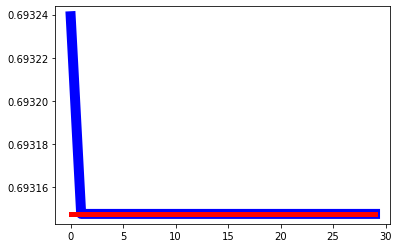

In [ ]:
plt.plot(trainLoss,color='blue',linewidth=10)
plt.plot(validLoss,color='orange',linewidth=2)
plt.plot(testLoss,color = 'red',linewidth=5)

In [ ]:
model.load_state_dict(torch.load('valid_model_catsdogs.pt'))

<All keys matched successfully>

In [ ]:
testLosses = []
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
  

  for data,targets in test_loader:
    
    if train_on_gpu:
      data,targets = data.cuda(),targets.cuda()

    output = model(data)
    loss = criterion(output,targets)
    test_loss = loss.item()*data.size(0)

    top_value,top_class = output.topk(1,dim=1)

    equals = top_class == targets.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))

   




In [ ]:
test_loss = test_loss/len(test_loader.dataset)
accuracy = accuracy/len(test_loader.dataset)
print(test_loss,accuracy)

3.4657368063926697e-06 tensor(0.0168)


Accuracy is just 1% using vanila convolution neural network. Now we will try transfer learning.

**Transfer learning**

In [ ]:
model = models.densenet121(pretrained=True)


In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

7978856

In [ ]:
for param in model.parameters():
  param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

In [ ]:
import torch.optim as optim
criterion = nn.NLLLoss()
# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

In [ ]:
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
  model.cuda()



In [ ]:
epochs = 1
steps = 0
running_loss = 0
print_every = 25
step_loss = np.Inf
for epoch in range(epochs):
    for inputs, labels in train_loader:

    
      steps += 1
      # Move input and label tensors to the default device
      if train_on_gpu:

        inputs, labels = inputs.cuda(), labels.cuda()
        
      optimizer.zero_grad()
      logps = model.forward(inputs)
      loss = criterion(logps, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)
      
      if steps % print_every == 0:


        test_loss = 0
        accuracy = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.cuda(), labels.cuda()
                logps = model.forward(inputs)
                batch_loss = criterion(logps, labels)
                
                test_loss += batch_loss.item() * inputs.size(0)
                
                # Calculate accuracy
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        test_loss = test_loss/len(test_loader)  
        if test_loss < step_loss:

          print('Testing loss decreased ({:.3f} --> {:.3f}).  Saving model ...'.format(step_loss, test_loss))
          torch.save(model.state_dict(), 'tranferLearning_DogsCats.pt')
          step_loss = test_loss
        
        print('Steps : ',steps)      
        print(f"Epoch {epoch+1}/{epochs}.. "
              f"Train loss: {running_loss/print_every:.3f}.. "
              f"Test loss: {test_loss:.3f}.. "
              f"Test accuracy: {accuracy/len(test_loader):.3f}")
        running_loss = 0
        model.train()

Testing loss decreased (inf --> 4.949).  Saving model ...
Steps :  25
Epoch 1/1.. Train loss: 7.012.. Test loss: 4.949.. Test accuracy: 0.951
Steps :  50
Epoch 1/1.. Train loss: 5.740.. Test loss: 7.305.. Test accuracy: 0.918
Steps :  75
Epoch 1/1.. Train loss: 6.902.. Test loss: 5.391.. Test accuracy: 0.944
Steps :  100
Epoch 1/1.. Train loss: 6.456.. Test loss: 5.805.. Test accuracy: 0.938
Steps :  125
Epoch 1/1.. Train loss: 7.773.. Test loss: 5.707.. Test accuracy: 0.939
Steps :  150
Epoch 1/1.. Train loss: 6.660.. Test loss: 6.207.. Test accuracy: 0.929
Steps :  175
Epoch 1/1.. Train loss: 6.800.. Test loss: 6.425.. Test accuracy: 0.930
Steps :  200
Epoch 1/1.. Train loss: 6.068.. Test loss: 6.122.. Test accuracy: 0.936
Steps :  225
Epoch 1/1.. Train loss: 7.899.. Test loss: 7.007.. Test accuracy: 0.914
Steps :  250
Epoch 1/1.. Train loss: 6.175.. Test loss: 5.113.. Test accuracy: 0.954


In [ ]:
inputs[1]

tensor([[[0.9765, 0.9765, 0.9765,  ..., 0.8784, 0.8980, 0.9255],
         [0.9765, 0.9529, 0.9686,  ..., 0.9608, 0.9255, 0.9137],
         [0.9608, 0.9529, 0.9647,  ..., 0.9059, 0.9176, 0.9176],
         ...,
         [0.6235, 0.6000, 0.5922,  ..., 0.8157, 0.8314, 0.7804],
         [0.6039, 0.6000, 0.6039,  ..., 0.7373, 0.7176, 0.7059],
         [0.5333, 0.6235, 0.6235,  ..., 0.7922, 0.7843, 0.7804]],

        [[0.9686, 0.9686, 0.9529,  ..., 0.8784, 0.9020, 0.9294],
         [0.9843, 0.9529, 0.9490,  ..., 0.9451, 0.9176, 0.9294],
         [0.9765, 0.9569, 0.9490,  ..., 0.8902, 0.9176, 0.9451],
         ...,
         [0.5882, 0.5569, 0.5333,  ..., 0.7922, 0.8118, 0.7686],
         [0.5686, 0.5569, 0.5412,  ..., 0.7176, 0.7176, 0.7294],
         [0.5059, 0.5843, 0.5608,  ..., 0.7765, 0.7882, 0.8196]],

        [[0.9176, 0.9294, 0.9569,  ..., 0.8471, 0.8588, 0.8784],
         [0.9294, 0.9098, 0.9451,  ..., 0.9176, 0.8863, 0.8980],
         [0.9294, 0.9216, 0.9373,  ..., 0.8667, 0.8980, 0.


**Dataset 2**

In [ ]:
# pwd = os.getcwd()

# train_dir2 = pwd + '/dataset/training_set'
# test_dir2 = pwd + '/dataset/test_set'

In [ ]:
# def getdir_paths(train_dir):
#   dirs_path = []
#   for root_folder in os.listdir(train_dir):

#     path_root = os.path.join(train_dir,root_folder)
#     dirs_path.append(path_root)
  
#   return dirs_path

In [ ]:
# dirs_path = getdir_paths(train_dir2)

In [ ]:
# # train_files = os.listdir(dirs_path[0]) + os.listdir(dirs_path[1])
# # cat_files = [img for img in train_files if 'cat' in img]
# # dog_files = [img for img in train_files if 'dog' in img]
# dogs = CatDogDataset(dog_files, dirs_path[1], transform = data_transform)
# cats = CatDogDataset(cat_files, dirs_path[0], transform = data_transform)
# dogcats = ConcatDataset([dogs,cats])
# train_loader = DataLoader(catdogs,batch_size=30,shuffle=True,num_workers=2)

# classes = ['cat','dog']
# data_iter = iter (train_loader)
# images,labels = data_iter.next()
# print(images[0].shape)
# fig = plt.figure(figsize=(12,12))

# for idx in np.arange(30):
#     ax = fig.add_subplot(2, 15, idx+1, xticks=[], yticks=[])
#     imshow(images[idx])
#     ax.set_title(classes[labels[idx]])
#     fig.tight_layout()
#     plt.subplots_adjust(wspace =0)
  

torch.Size([3, 128, 128])


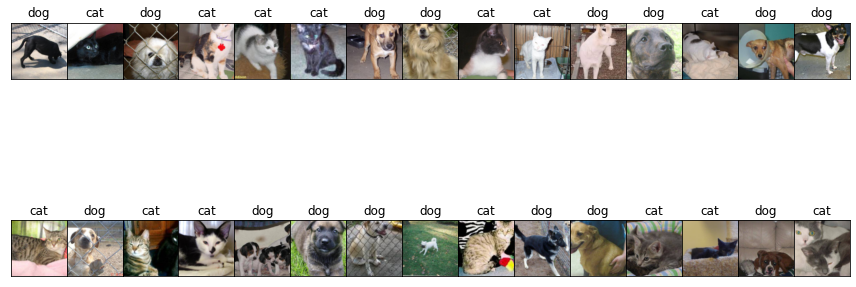